In [1]:
import tensorflow as tf

In [2]:
!git clone https://github.com/SebastianRiquelmeM/iris_parameters_dataset.git
!rm -r iris_parameters_dataset/.git
!git clone https://github.com/SebastianRiquelmeM/dataset_iris_flowers.git
!rm -r dataset_iris_flowers/.git

Cloning into 'iris_parameters_dataset'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 1.32 KiB | 1.32 MiB/s, done.
Cloning into 'dataset_iris_flowers'...
remote: Enumerating objects: 820, done.
remote: Counting objects: 100% (820/820), done.
remote: Compressing objects: 100% (820/820), done.
remote: Total 820 (delta 3), reused 817 (delta 0), pack-reused 0
Receiving objects: 100% (820/820), 9.90 MiB | 1.04 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [3]:
data_dir = "dataset_iris_flowers"

params = {
    "directory": data_dir,
    "validation_split": 0.2,
    "seed": 12345,
    "image_size": (180, 180),
    "batch_size": 32,
}

train_params = {**params, **{"subset": "training"}}
val_params = {**params, **{"subset": "validation"}}
train_params

{'directory': 'dataset_iris_flowers',
 'validation_split': 0.2,
 'seed': 12345,
 'image_size': (180, 180),
 'batch_size': 32,
 'subset': 'training'}

In [4]:
#Datos para entrenamiento
train_ds = tf.keras.utils.image_dataset_from_directory(**train_params)

Found 421 files belonging to 3 classes.
Using 337 files for training.


In [5]:
#Datos para validation
val_ds  = tf.keras.utils.image_dataset_from_directory(**val_params)

Found 421 files belonging to 3 classes.
Using 84 files for validation.


In [6]:
#nombres de las clases
class_names = train_ds.class_names
class_names

['iris-setosa', 'iris-versicolour', 'iris-virginica']

# Visualización de los datos

In [7]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


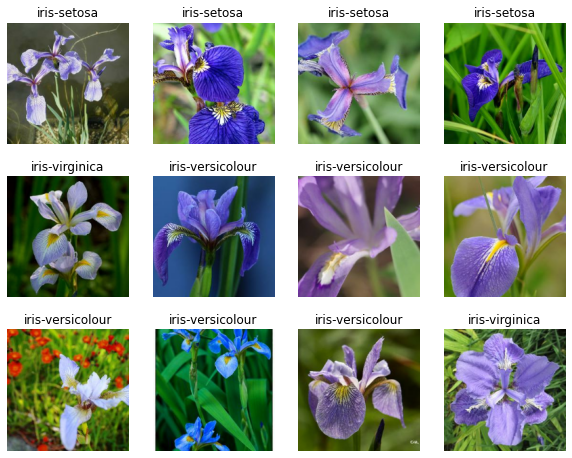

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
#tomamos el primero
for images, labels in  train_ds.take(1):
  #y las primeras 12 imagenes
  for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Preprocesamiento de los datos

In [9]:
# Creacion capa reescalado
rescaling_layer = tf.keras.layers.Rescaling(1.0 / 255)

#Aplica la funcion a cada imagen del dataset

rescaled_ds = train_ds.map(lambda x, y: (rescaling_layer(x), y))

#Se debe iterar sobre cada batch
image_batch, labels_batch = next(iter(rescaled_ds))

# Configuración del dataset para el desempeño

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Creación del modelo usando Sequential

In [11]:
num_classes = 3
model = tf.keras.Sequential(
    [
        tf. keras.layers.Rescaling(1.0 / 255),
        #
        tf. keras.layers.Conv2D(32, 3, activation="relu"),
        tf. keras.layers.MaxPooling2D(),
        #
        tf. keras.layers.Conv2D(32, 3, activation="relu"),
        tf. keras.layers.MaxPooling2D(),
        #
        tf. keras.layers.Conv2D(32, 3, activation="relu"),
        tf. keras.layers.MaxPooling2D(),
        #
        tf. keras.layers.Flatten(),
        tf. keras.layers.Dense(128, activation="relu"),
        tf. keras.layers.Dense(num_classes),
    ]
)

# Compilación y entrenamiento del modelo

In [12]:
model.compile(
    optimizer = "adam",
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 3,
)

Epoch 1/3
11/11 [==============================] - 11s 131ms/step - loss: 0.9801 - accuracy: 0.6053 - val_loss: 0.9236 - val_accuracy: 0.6310
Epoch 2/3
11/11 [==============================] - 0s 38ms/step - loss: 0.8973 - accuracy: 0.6409 - val_loss: 0.8980 - val_accuracy: 0.6310
Epoch 3/3
11/11 [==============================] - 0s 38ms/step - loss: 0.8611 - accuracy: 0.6409 - val_loss: 0.8967 - val_accuracy: 0.6310
